## Imports

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rc('font', family='Georgia')

from generalist_cmaes_config import ENEMY_SETS, NGEN

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Folders for loading data for each algorithm

In [38]:
CMAES_DATAPATH = os.path.join('data', 'cmaes')
NEAT_DATAPATH = os.path.join('data', 'neat')

Unpack the enemy sets

In [39]:
ENEMY_SET_1 = ENEMY_SETS['set_1']
ENEMY_SET_2 = ENEMY_SETS['set_2']

Folder for saving the results (figures)

In [40]:
FIGURE_PATH = os.path.join('figures', 'generalist')
os.makedirs(FIGURE_PATH, exist_ok=True)

## Figure 1: Fitness comparison

This figure presents a comparison of fitness of generalist agents trained with two evolutionary algorithms: CMAES and NEAT across all generations.

### Load CMAES fitness data

In [41]:
cmaes_data = np.array([
    np.load(os.path.join(CMAES_DATAPATH, "set_1", "hp_crit_mean_of_max", "train_all_fitnesses.npy")),
    np.load(os.path.join(CMAES_DATAPATH, "set_2", "hp_crit_mean_of_max", "train_all_fitnesses.npy"))
])

print(cmaes_data.shape)

(2, 10, 50, 58)


Obtain maximums, HOF-maximums and means of fitnesses for each generation

In [42]:
# Max fitness among individuals
cmaes_max = np.max(cmaes_data, axis=3)
print(cmaes_max.shape)

# Hall-of-fame variant instead of generational max
cmaes_hof = np.maximum.accumulate(cmaes_max, axis=2)
print(cmaes_hof.shape)

# Mean fitness among individuals
cmaes_mean = np.mean(cmaes_data, axis=3)
print(cmaes_mean.shape)

(2, 10, 50)
(2, 10, 50)
(2, 10, 50)


### Load NEAT fitness data

In [43]:
neat_data = np.array([
    np.load(os.path.join(NEAT_DATAPATH, "set_1", "all_fitnesses_static.npy")),
    np.load(os.path.join(NEAT_DATAPATH, "set_2", "all_fitnesses_static.npy"))
])

print(neat_data.shape)

(2, 10, 50, 352)


Obtain maximums and means of fitnesses for each generation

In [44]:
# Max fitness among individuals
neat_max = np.nanmax(neat_data, axis=3)
print(neat_max.shape)

# Mean fitness among individuals
neat_mean = np.nanmean(neat_data, axis=3)
print(neat_mean.shape)

(2, 10, 50)
(2, 10, 50)


### Plotting

In [76]:
def plot_mean_with_sd(ax, xx, means, sds, color="blue", label=""):
    """
    Helper function for plotting mean values with standard deviations
    """
    line = ax.plot(xx, means, color=color, linestyle="solid", lw=1.8)
    ax.fill_between(xx, means + sds, means - sds, color=color, alpha=0.2, edgecolor=color, linewidth=0.0)
    ax.plot(xx, means + sds, color=color, linestyle="solid", lw=0.5, alpha=0.5)
    ax.plot(xx, means - sds, color=color, linestyle="solid", lw=0.5, alpha=0.5)

    return line[0]

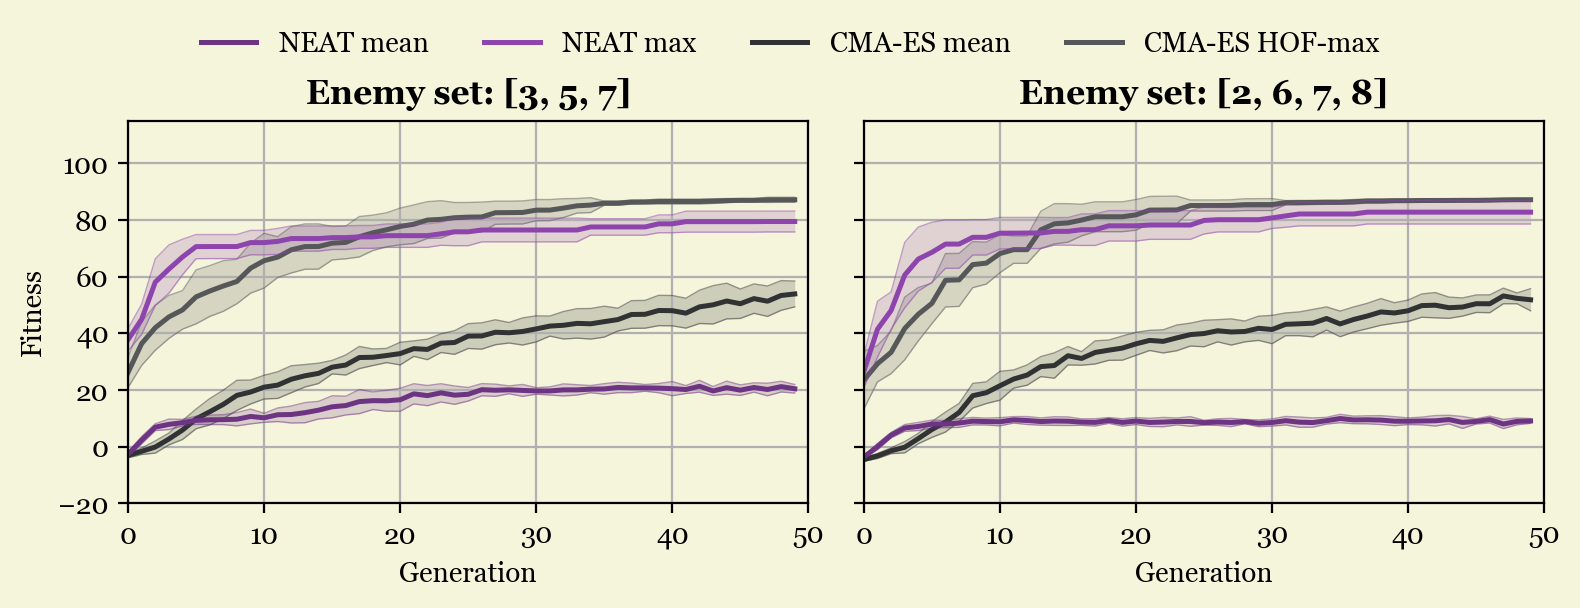

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=200, sharey=True)
fig.patch.set_facecolor('beige')

# Plot formatting
for (i, enemy_set) in enumerate([ENEMY_SET_1, ENEMY_SET_2]):
    axes[i].set_ylim(-20, 115)
    axes[i].set_yticks(np.arange(-20, 101, 20))

    axes[i].set_facecolor('beige')

    if i == 0:
        axes[i].set_ylabel("Fitness")
        
    axes[i].set_xlim(0, NGEN)
    axes[i].set_xticks(np.arange(0, NGEN + 1, 10))
    axes[i].set_xlabel("Generation")
    axes[i].set_title(f"Enemy set: {enemy_set}", weight="bold")
    axes[i].grid()

lines = []
labels = []
for i in range(2):
    # line1 = axes[i].errorbar(range(NGEN), neat_avg_mean[i], yerr=neat_sd_mean[i], alpha=0.6, lw=1.2, color="red", label="NEAT mean")
    # line2 = axes[i].errorbar(range(NGEN), neat_avg_max[i], yerr=neat_sd_max[i], alpha=0.6, lw=1.2, color="darkred", label="NEAT max")
    # line3 = axes[i].errorbar(range(NGEN), np.mean(cmaes_mean[i], axis=0), yerr=np.std(cmaes_mean[i], axis=0), alpha=0.6, lw=1.2, color="royalblue", label="CMAES mean")
    # line4 = axes[i].errorbar(range(NGEN), np.mean(cmaes_max[i], axis=0), yerr=np.std(cmaes_max[i], axis=0), alpha=0.6, lw=1.2, color="darkblue", label="CMAES max")
    # line5 = axes[i].errorbar(range(NGEN), np.mean(cmaes_hof[i], axis=0), yerr=np.std(cmaes_hof[i], axis=0), alpha=0.6, lw=1.2, color="green", label="CMAES HOF-max")

    line3 = plot_mean_with_sd(axes[i], range(NGEN), np.mean(cmaes_mean[i], axis=0), np.std(cmaes_mean[i], axis=0), color="#313233", label="CMAES-mean")
    # line4 = plot_mean_with_sd(axes[i], range(NGEN), np.mean(cmaes_max[i], axis=0), np.std(cmaes_max[i], axis=0), color="#565759", label="CMAES-max")
    line4 = plot_mean_with_sd(axes[i], range(NGEN), np.mean(cmaes_hof[i], axis=0), np.std(cmaes_hof[i], axis=0), color="#565759", label="CMAES HOF-max")

    line1 = plot_mean_with_sd(axes[i], range(NGEN), np.mean(neat_mean[i], axis=0), np.std(neat_mean[i], axis=0), color="#6C3483", label="NEAT-mean")
    line2 = plot_mean_with_sd(axes[i], range(NGEN), np.mean(neat_max[i], axis=0), np.std(neat_max[i], axis=0), color="#8E44AD", label="NEAT-max")

    if i == 0:
        lines.extend([line1, line2, line3, line4])
        labels.extend(["NEAT mean", "NEAT max", "CMA-ES mean", "CMA-ES HOF-max"])

fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.legend(lines, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.02), fontsize=10, frameon=False)
# fig.savefig("figures/convergence.png", dpi=400)
plt.show()